<a href="https://colab.research.google.com/github/sonajain511/LyricsAnalysis/blob/main/Lyrics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Million Dollar Dataset Dataframe

In [ ]:
import pandas as pd 

In [ ]:
import sqlite3

# track_metadata.db only has the songs table
# mxm_dataset.db 


# also have artist_similarity.db
con = sqlite3.Connection('/content/drive/My Drive/track_metadata.db')
con.row_factory = sqlite3.Row

## telling what tables exist 
'''
cursorObj = con.cursor()
cursorObj.execute('SELECT name from sqlite_master where type= "table"')
print(cursorObj.fetchall())
'''

# sql_fetch(con)

# also have songs
cur = con.cursor()
cur.execute('SELECT * FROM songs')

count = 0
mdd_list = []
for row in cur.fetchall():
     # can convert to dict if you want:
     # print(dict(row))
     mdd_list.append((list(dict(row).values())[0], list(dict(row).values())[1], list(dict(row).values())[6]))
     count += 1

print(count)

1000000


In [ ]:
print(mdd_list[0][0:3])

('TRMMMYQ128F932D901', 'Silent Night', 'Faster Pussy cat')


In [ ]:
df_mdd = pd.DataFrame(mdd_list, columns = ['track_id', 'title', 'artist_name'])

# MusixMatch Datase Dataframe

In [ ]:
import sqlite3

# track_metadata.db only has the songs table
# mxm_dataset.db 


# also have artist_similarity.db
con = sqlite3.Connection('/content/drive/My Drive/mxm_dataset.db')
con.row_factory = sqlite3.Row

## telling what tables exist 
'''
cursorObj = con.cursor()
cursorObj.execute('SELECT name from sqlite_master where type= "table"')
print(cursorObj.fetchall())
'''

# sql_fetch(con)

# also have songs
cur = con.cursor()
cur.execute('SELECT * FROM lyrics')

count = 0
mxm_list = []
for row in cur.fetchall():
     # can convert to dict if you want:
     # print(dict(row).values()[0], dict(row).values()[0]
     mxm_list.append([list(dict(row).values())[0], list(dict(row).values())[2], list(dict(row).values())[3]])
     count += 1 
     
print(count)

# use both these databases to group together songs

19045332


In [ ]:
# print(mxm_list[14284100])
print(mxm_list[1])
print(mxm_list[2])

['TRAAAAV128F421A322', 'the', 4]
['TRAAAAV128F421A322', 'you', 2]


In [ ]:
df_mxm = pd.DataFrame(mxm_list, columns = ['track_id', 'word', 'word_count'])

# Song Features Dataframe 

In [ ]:
main_df = pd.read_csv('/content/drive/My Drive/song_features.csv')

NameError: ignored

In [ ]:
print(main_df['msd_track_id'][0])

TRAAABD128F429CF47


In [ ]:
df_sf = main_df[['msd_track_id','genre']]

# Final Dataframe

In [ ]:
merged_inner = pd.merge(left=df_mdd, right=df_mxm, left_on='track_id', right_on='track_id')

In [ ]:
print(merged_inner.loc[[2]])

             track_id title      artist_name word  word_count
2  TRMMMKI128F931D80D   006  Lena Philipsson  you          13


In [ ]:
final_merged_dataset = pd.merge(left=df_mxm, right = df_sf, left_on = 'track_id', right_on = 'msd_track_id')

In [ ]:
final_merged_dataset.to_csv('lyricsbased1.csv', encoding='utf-8', index=False)

# New Dictionary

In [ ]:
import pandas as pd

df_main_lb = pd.read_csv('/content/drive/My Drive/lyricsbased1.csv')

# mxm_list 



# Initial Processing

In [ ]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words)

{'hasn', 'a', 'these', 'be', 'down', 'y', 'because', 'above', 'or', "shan't", 'an', 'haven', 'hers', "she's", 'yourselves', 'it', 's', 're', 'am', 'ourselves', "aren't", "doesn't", 'only', 'them', 'so', 'didn', 'him', 'too', 'from', 'won', 'off', 'he', "wouldn't", 'himself', "you're", 'yourself', 'don', 'wouldn', 'of', "needn't", 'in', 'if', "that'll", 'again', 'here', 't', 'shan', 'its', 'is', "you've", 'd', 'below', 'no', 'was', 'which', 'doing', 'herself', 'few', 'very', 'couldn', 'i', 'your', 'theirs', 'once', 'by', "should've", 'wasn', 'to', 'my', 'can', 'needn', "hadn't", 'we', 'how', 'his', 'yours', 'up', 'while', 'any', 'itself', 'with', 'our', 'ours', 'hadn', 'aren', 'had', 'myself', 'll', 'weren', 'have', 'against', 'whom', "couldn't", 'her', "you'd", 'this', 'been', 'into', 'both', 'being', 'she', 'under', "don't", 'you', 'each', "hasn't", 'but', 'doesn', 'not', 'ain', 'there', 'until', 'out', 'does', 'between', 'were', 'then', 've', 'isn', 'mightn', 'and', 'that', 'they', '

In [ ]:
## setting up the dictionary

# putting master dictionary together 
temp_dict = {}
lb_dict = {}
# recording list of genres and tracks together 
track_list = []
genre_list = []
# cominating lyrics (idk spelling)
main_lyrics_list = []
lyrics_list = []
# listing number of occurences of a word in a genre 
word_genre_list = []
# comment 
genre_track_lyrics_list = []
# for clustering 
string = ""
genre_track_string_list = []

final_index = df_main_lb.shape[0] - 1
# print(mxm_list[0][0])
for index in range(df_main_lb.shape[0] - 1):
  if df_main_lb['word'][index] not in stop_words:
    word_genre_list.append([df_main_lb['word'][index], df_main_lb['genre'][index], df_main_lb['word_count'][index]])
  if df_main_lb['track_id'][index] != df_main_lb['track_id'][index + 1]:
    temp_dict.update({df_main_lb['word'][index] : df_main_lb['word_count'][index]})
    lb_dict.update({df_main_lb['track_id'][index]: temp_dict})
    temp_dict = {}
    track_list.append(df_main_lb['track_id'][index])
    genre_list.append(df_main_lb['genre'][index])
    main_lyrics_list.append(lyrics_list)
    genre_track_lyrics_list.append([df_main_lb['genre'][index], df_main_lb['track_id'][index], lyrics_list])
    string = ' '.join(str(item) for item in lyrics_list)
    genre_track_string_list.append([df_main_lb['genre'][index], df_main_lb['track_id'][index], string])
    lyrics_list = []
  else:
    temp_dict.update({df_main_lb['word'][index] : df_main_lb['word_count'][index]}) 
    if df_main_lb['word'][index] not in stop_words:
      lyrics_list.extend((df_main_lb['word'][index]) for j in range(df_main_lb['word_count'][index]))
      
temp_dict.update({df_main_lb['word'][final_index] : df_main_lb['word_count'][final_index]})
lb_dict.update({df_main_lb['track_id'][final_index]: temp_dict})
track_list.append(df_main_lb['track_id'][final_index])
genre_list.append(df_main_lb['genre'][final_index])
main_lyrics_list.append(lyrics_list)
genre_track_lyrics_list.append([df_main_lb['genre'][final_index], df_main_lb['track_id'][final_index], lyrics_list])
string = ' '.join(str(item) for item in lyrics_list)
genre_track_string_list.append([df_main_lb['genre'][index], df_main_lb['track_id'][index], string])
lyrics_list = []
string = ""



In [ ]:
genre_track_lyrics_list.sort()

In [ ]:
print(lb_dict[track_list[0]])
print(lb_dict[track_list[1]])
print(lb_dict[track_list[2]])
print(lb_dict[track_list[10000]])

{'i': 10, 'you': 17, 'to': 8, 'and': 2, 'a': 2, 'me': 1, 'it': 3, 'not': 2, 'in': 3, 'my': 4, 'is': 3, 'your': 7, 'that': 5, 'do': 5, 'are': 6, 'for': 4, 'no': 1, 'have': 6, 'so': 2, 'know': 5, 'but': 3, 'what': 3, 'when': 2, 'time': 3, 'can': 1, 'there': 5, 'la': 7, 'get': 2, 'got': 3, 'never': 2, 'feel': 2, 'want': 2, 'would': 2, 'day': 4, 'away': 2, 'yeah': 4, 'heart': 5, 'could': 2, 'need': 3, 'our': 2, 'look': 2, 'where': 2, 'thing': 2, 'think': 1, 'live': 1, 'onli': 2, 'tri': 1, 'keep': 3, 'dream': 2, 'wanna': 3, 'find': 3, 'hear': 1, 'believ': 1, 'everyth': 2, 'someth': 4, 'insid': 2, 'chang': 2, 'soul': 7, 'new': 1, 'start': 2, 'pleas': 2, 'true': 1, 'while': 2, 'deep': 4, 'beat': 1, 'after': 2, 'fade': 2, 'wast': 3, 'trust': 1, 'alreadi': 2, 'style': 2, 'asleep': 1, 'wors': 2, 'goal': 2}
{'i': 5, 'the': 4, 'you': 3, 'to': 2, 'and': 1, 'a': 11, 'not': 4, 'is': 9, 'of': 3, 'that': 2, 'do': 1, 'are': 1, 'for': 3, 'know': 1, 'this': 1, 'with': 1, 'when': 1, 'can': 1, 'she': 3, 'if

# Words by Genre & TF-IDF

In [ ]:
genre_track_lyrics_list.sort()
print(genre_track_lyrics_list[1])

['Blues', 'TRABMMM128F429199D', ['te', 'vi']]


In [ ]:
print(len(word_genre_list))
print(set(genre_list))
genre_names = list(set(genre_list))
print(word_genre_list[125])
print(word_genre_list[126])
print(len(genre_names))

word_genre_counts = []
lyric = []

for index in range(len(word_genre_list)):
  # print("word:", word_genre_list[index][0])
  if word_genre_list[index][0] not in lyric:
    temp = []
    lyric.append(word_genre_list[index][0])
    temp.append(word_genre_list[index][0])
    temp.extend([0] * len(genre_names))
    temp[genre_names.index(word_genre_list[index][1]) + 1] += word_genre_list[index][2] 
    word_genre_counts.append(temp)
  else: 
    temp_index = lyric.index(word_genre_list[index][0])
    word_genre_counts[temp_index][genre_names.index(word_genre_list[index][1]) + 1] += word_genre_list[index][2]

# print(word_genre_counts)


4984369
{'Rock', 'Country', 'Punk', 'RnB', 'Pop', 'Blues', 'Rap', 'World', 'Electronic', 'New_Age', 'Reggae', 'Folk', 'Jazz', 'Latin', 'Metal'}
['runaway', 'Punk', 2]
['en', 'Pop', 1]
15


In [ ]:
print(len(genre_names))
print(len(lyric))

15
4884


In [ ]:
genre_names.insert(0, 'word')
len(genre_names)
df_wg = pd.DataFrame(word_genre_counts, columns = genre_names)
df_wg = (df_wg.assign(sum=df_wg.sum(axis=1))  # Add temporary 'sum' column to sum rows.
        .sort_values(by='sum', ascending=False)  # Sort by row sum descending order.
        .iloc[:, :-1])  # Remove temporary `sum` column.

print(df_wg)

## plan 
# - list of unique lyrics (dataframe first column)
# - if non-zero (just consider set), then take document frequency and then corpus frequency (log calculation on the latter)


          word  Folk  Punk  New_Age  Jazz  Country  Electronic    RnB  World  \
129       love  2569  1419      199  2514     7965        3746  15228    428   
0         know  2091  3019      119  1409     5147        3509   9482    248   
130       like  2083  2241      124  1103     4859        3174   6342    172   
3          get  1200  2122       57   882     3674        2377   5543     85   
132         go  2010  2260      108   856     3580        2747   5136    258   
...        ...   ...   ...      ...   ...      ...         ...    ...    ...   
2841     nossa     0     0        0     8        0           0      0      1   
3915  alleluia    24    19        0     1        0           0      3      0   
4822       aqu     0     0        0     0        0           0      0      0   
4852      cari     1     0       12     1        0           0      0      1   
4821     coraz     0     0        0     1        0           0      1      0   

       Rock  Latin    Pop  Blues    Rap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


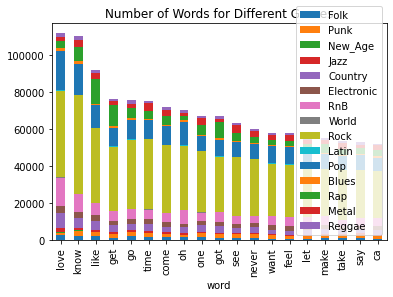

In [ ]:
df_wg.iloc[0:19].plot.bar(x='word', stacked=True, title='Number of Words for Different Genres')

# ensembling? 

In [ ]:
df_wg = df_wg.transpose()

total = df_wg.iloc[1:16].sum()
print(total)
#good source: https://thispointer.com/pandas-sum-rows-in-dataframe-all-or-certain-rows/
#replace index with song lyric 

129     111771
0       110152
130      91854
3        76393
132      75453
         ...  
2841        67
3915        61
4822        43
4852        41
4821        26
Length: 4884, dtype: object


In [ ]:
## start TF-IDF here - DO SOME RESEARCH 
## "visualization" idea 
## or tf-idf by genre??? vs tf-idf by songs?? (TA said the latter, but I think for our analysis, also for genre may make sense --> should be fine as long as I justify)
## By genre: (word frequency of word in song/total word frequency in song)*log(#numbers songs within genre that has the word/#numbers of songs in genre)
    - do by 15 matrix, one per genre?? --> wouldn't make sense to all genre listed ##actually think this one to recommend song from same/different genre 
    - similar TF-IDF values implies sets of words have similar importances to each of their respective genre 
## By song: (word frequency of word in song/total word frequency in song)*log(#numbers songs that has the word/total number of songs listed)
## Have genre as document and all songs as corpus? --> but then recommending songs

## song in a genre 


In [ ]:
tf = []
genre_track_lyrics_list.sort()
# print(genre)

list_of_tracks = []

for index in range(len(genre_track_lyrics_list)):
  temp = [0]*len(lyric)
  list_of_tracks.append(genre_track_lyrics_list[index][1])
  words_in_song = genre_track_lyrics_list[index][2]
  unique_words = list(set(words_in_song))
  for j in range(len(unique_words)):
    lyric_index = lyric.index(unique_words[j])
    temp[lyric_index] += words_in_song.count(unique_words[j])/len(words_in_song)
  tf.append(temp)

# print(tf[1])

In [ ]:
print(tf)

KeyboardInterrupt: ignored

In [ ]:
number_of_each_genre = []
count = 1
genre_track_lyrics_list
song_count = 1
limits = []

for index in range(len(genre_track_lyrics_list) - 1):
  if genre_track_lyrics_list[index][0] != genre_track_lyrics_list[index + 1][0]:
    number_of_each_genre.append(count)
    limits.append(song_count)
    count = 1
  else:
    count = count + 1 
  song_count += 1

count = count + 1
number_of_each_genre.append(count)

In [ ]:
print(genre_track_lyrics_list[8909][1])
print(number_of_each_genre)
print(limits)

TRAAJJW128F4298683
[1049, 4320, 3540, 2290, 1405, 2399, 5846, 206, 11449, 3010, 3836, 1640, 3529, 48046, 792]
[1049, 5369, 8909, 11199, 12604, 15003, 20849, 21055, 32504, 35514, 39350, 40990, 44519, 92565]


In [ ]:
import math 

idf = []
temp = [0.000001]*len(lyric)
limit_calls = 0 

for index in range(len(genre_track_lyrics_list)):
  if index in limits:
    #idf part 
    temp = [number_of_each_genre[limit_calls]/element for element in temp]
    temp = [math.log2(element) for element in temp]
    idf.append(temp)
    limit_calls += 1 
    temp = [0.000001]*len(lyric)
  words_in_song = genre_track_lyrics_list[index][2]
  unique_words = list(set(words_in_song))
  for j in range(len(unique_words)):
    lyric_index = lyric.index(unique_words[j])
    temp[lyric_index] += 1

temp = [element * number_of_each_genre[limit_calls] for element in temp]
temp = [math.log2(element) for element in temp]
idf.append(temp)


In [ ]:
import numpy as np

tf = np.asarray(tf)
idf = np.asarray(idf)
tf_idf = []
limit_calls = 0 

for index in range(len(tf)):
  if index in limits:
    limit_calls += limit_calls
  tf_idf.append(tf[index]*idf[limit_calls]) 
  


In [ ]:
import scipy
from scipy.spatial import distance

In [ ]:
scipy.spatial.distance.cosine(tf_idf[0], tf_idf[3])

0.9823201045520398

In [ ]:
list_of_tracks.index('TRDXRVT128E078EA86')

1714

In [ ]:
song_pairs_tf_idf = []

for index in range(len(list_of_tracks)):
  if index > 1048 and index < 5369:
    dist = scipy.spatial.distance.cosine(tf_idf[1714], tf_idf[index])
    song_pairs_tf_idf.append([dist, list_of_tracks[index]])
    

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
song_pairs_tf_idf.sort()
for index in range(10):
  print("Recommendation", index + 1, ":", song_pairs_tf_idf[index][1])

Recommendation 1 : TRDXRVT128E078EA86
Recommendation 2 : TRGDLQC128F4270523
Recommendation 3 : TRJSRWA128F92CD64C
Recommendation 4 : TRSHBDG128F1493B34
Recommendation 5 : TRRKVTG128F4266634
Recommendation 6 : TRJSJXD128F1465C5E
Recommendation 7 : TRULRPW128F92E7190
Recommendation 8 : TRUEHQP128F42647EF
Recommendation 9 : TRVSWYO128E07963B5
Recommendation 10 : TRUJQWL128F4293557


In [ ]:
import random
sample_test = random.sample(range(0, len(list_of_tracks)), 10)
print(sample_test)

[37626, 62255, 50327, 53714, 62845, 37348, 12238, 7439, 14144, 43526]


In [ ]:
total = [0]*4884
for index in range(len(sample_test)):
  total += tf_idf[index]

mean = [element * (1/len(list_of_tracks)) for element in total]

In [ ]:
song_pairs_tf_idf_mean = []

for index in range(len(list_of_tracks)):
  if index not in sample_test:
    dist = scipy.spatial.distance.cosine(mean, tf_idf[index])
    song_pairs_tf_idf_mean.append([dist, list_of_tracks[index]])

song_pairs_tf_idf_mean.sort()

print("Recommendation:", song_pairs_tf_idf_mean[0][1])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Recommendation: TRABMMM128F429199D


In [ ]:
print(song_pairs_tf_idf_mean[0][0])

0.11161376260913214


# Clustering 

In [ ]:
import pandas as pd

genre_track_string_list.sort()

df_gtl = pd.DataFrame(genre_track_string_list, columns = ['genre', 'track_id', 'lyrics'])

In [ ]:
df_gtl.head()
df_gtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93356 entries, 0 to 93355
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre     93356 non-null  object
 1   track_id  93356 non-null  object
 2   lyrics    93356 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [ ]:
df_gtl.to_csv('genre_track_lyrics_data.csv')

In [ ]:
df_gtl = pd.read_csv('/content/drive/My Drive/genre_track_lyrics_data.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 

# stop_words = set(stopwords.words('english'))

In [ ]:
# df_lyrics = df_gtl['lyrics'].loc[0:44519]
print(df_gtl['lyrics'][0])

documents = df_gtl['lyrics'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words = 'english')
features = vectorizer.fit_transform(documents)

know know know know know know know know know know come see got got got got got make make say say day babi world world gonna gonna gonna gonna gonna gonna man man man man well well well well well well well girl wanna good hand said believ black everybodi everybodi everybodi everybodi everybodi son told water woman born born lead pretti mother gun hour bone jump mess mess shout luck cat seven seven women hundr dollar john doctor root month gypsi tooth fore


In [ ]:
K = 15
model = KMeans(n_clusters = K, init = "k-means++", max_iter = 50, n_init = 1)
model.fit(features)

KMeans(max_iter=50, n_clusters=15, n_init=1)

In [ ]:
df_gtl['cluster'] = model.labels_

In [ ]:
df_gtl.head()

,Unnamed: 0,genre,track_id,lyrics,cluster
0,0,Blues,TRAAZGC12903CB5DFB,know know know know know know know know know k...,11
1,1,Blues,TRABMMM128F429199D,te vi,0
2,2,Blues,TRABWPT128F42B06CC,love know like time go oh oh let let ca ca ca ...,6
3,3,Blues,TRABYAR128F931B1A4,love love know know know time one one one neve...,2
4,4,Blues,TRACBWQ128F92F2B91,come come come go get see see see see see got ...,0


In [ ]:
df_gtl.to_csv('clustering.csv')

In [ ]:
df_clustering = pd.read_csv('/content/clustering.csv')

In [ ]:
genre = df_clustering['genre'].tolist()
cluster = df_clustering['cluster'].tolist()

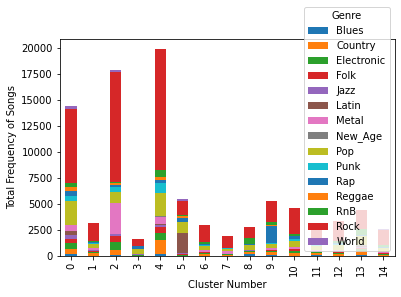

In [ ]:
x = [tup for tup in cluster]
y = [tup for tup in genre]

df = pd.DataFrame({'x':x, 'y':y, 'freq_y':0})

ax = df.groupby(['x','y']).count().unstack(1).plot(y='freq_y',kind='bar', stacked=True)
ax.set_ylabel('Total Frequency of Songs')
ax.set_xlabel('Cluster Number')
plt.legend(title="Genre")
plt.show()

In [ ]:
df_gtl.loc[df_gtl['cluster'] == 3]

,Unnamed: 0,genre,track_id,lyrics,cluster
1,1,Blues,TRABMMM128F429199D,te vi,3
140,140,Blues,TRDFIQP128F42A405F,come come la la la la la la la la la la la la ...,3
150,150,Blues,TRDKRAV128F14A93DC,en en en en se se se sun sun et et et et et et...,3
173,173,Blues,TRDWOLN128F9339E31,de te tu tu tu tu e e amor na na qui eu eu eu ...,3
245,245,Blues,TRFVPPD12903CF4BF4,que que que que que que que que que de de de e...,3
...,...,...,...,...,...
93346,93346,World,TRZSXYO128F92F81D0,em mai um dia,3
93350,93350,World,TRZVRTV128E0799B27,oh oh la la la te te te te te te te te te te t...,3
93352,93352,World,TRZWEOG128F93423F6,que que que que de de de te em eu eu eu não nã...,3
93354,93354,World,TRZZBKA128F146D61B,la la la la la la un un te te te te tu se se s...,3


# Frequency Histograms

In [ ]:
## print out of dictionary 

for x in lb_dict:
    print (x)
    for y in lb_dict[x]:
        print (y,':',lb_dict[x][y])
        


Streaming output truncated to the last 5000 lines.
load : 1
trade : 1
island : 1
disco : 1
twenti : 1
truck : 2
wow : 1
pant : 1
zone : 1
driver : 1
watchin : 1
local : 1
cap : 1
offic : 1
mail : 1
jumpin : 1
groovi : 1
TRKHWSB128F934C602
i : 82
the : 1
you : 43
to : 47
and : 9
a : 7
me : 2
not : 1
my : 1
your : 1
that : 1
on : 17
are : 16
we : 2
am : 2
will : 80
for : 16
be : 77
have : 1
love : 2
know : 6
just : 3
when : 15
time : 1
there : 66
up : 1
oh : 4
they : 1
see : 1
got : 1
feel : 3
ca : 1
babi : 15
yeah : 7
here : 1
need : 3
thing : 15
think : 1
well : 2
mind : 1
long : 1
wanna : 1
find : 1
some : 3
light : 6
wait : 22
hold : 15
hey : 1
someth : 1
put : 1
blue : 15
line : 1
ooh : 3
shine : 6
lone : 3
set : 1
easi : 1
such : 1
shall : 2
ok : 1
comfort : 18
whenev : 1
compani : 3
aah : 1
TRKHWWH128F932A7FF
i : 25
the : 17
to : 3
and : 10
a : 7
it : 6
not : 1
in : 4
my : 10
is : 3
of : 3
on : 6
am : 2
will : 6
all : 4
for : 2
be : 5
have : 1
love : 10
so : 3
but : 1
just : 1
whe

KeyboardInterrupt: ignored

In [ ]:
index_1 = track_list.index('TRMMMQY128F92F0EA3')
print(index_1)
print(genre_list[index_1])
print(len(track_list))

87711
Rock
93355


In [ ]:
## calculating percentage of matching keys between songs - Same Genre

import random

# intersection_of_keys = []
sample = [24500, 8265, 20251]
# sample = random.sample(range(0, len(track_list)), 3)
print(sample)
percentages = []
for index in range(len(sample)):
  song_of_interest = lb_dict[track_list[sample[index]]] #will have to choose a smaller sample of songs to compare 
  print(song_of_interest)
  percentage_of_shared_words = []
    # print(lb_dict[x].keys())
  for y in lb_dict:
      if song_of_interest != y and genre_list[track_list.index(track_list[sample[index]])] == genre_list[track_list.index(y)]:
      # if track_list[2] != y and len(lb_dict[y].keys()) > 4:
        percentage_of_shared_words.append(len(song_of_interest & lb_dict[y].keys())/len(song_of_interest))
          # intersection_of_keys.append([percentage_of_shared_words, len(song_of_interest[x].keys()), len(lb_dict[y].keys()), x, y])
  # print(x)
  percentages.append(percentage_of_shared_words)


# print(intersection_of_keys[1])

[24500, 8265, 20251]
{'se': 1, 'chorus': 2, 'ja': 6, 'ei': 2, 'x2': 1, 'kun': 2, 'alla': 1, 'mie': 1, 'soi': 2, 'olla': 1}
{'i': 23, 'the': 27, 'you': 2, 'and': 2, 'me': 3, 'it': 1, 'not': 10, 'is': 1, 'of': 3, 'that': 2, 'do': 11, 'are': 1, 'love': 4, 'know': 1, 'this': 1, 'but': 3, 'what': 3, 'when': 2, 'can': 1, 'there': 1, 'out': 17, 'get': 1, 'see': 2, 'got': 1, 'ca': 2, 'day': 6, 'life': 2, 'yeah': 8, 'night': 6, 'been': 1, 'think': 1, 'onli': 1, 'whi': 5, 'well': 3, 'good': 1, 'turn': 6, 'then': 1, 'light': 16, 'into': 6, 'hear': 1, 'hey': 15, 'should': 3, 'old': 1, 'pleas': 5, 'care': 1, 'hope': 1, 'put': 16, 'blue': 1, 'beauti': 2, 'understand': 1, 'best': 2, 'knew': 3, 'somebodi': 9, 'trust': 4, 'worri': 1, 'joy': 1, 'quit': 3, 'everywher': 1, 'taken': 1, 'makin': 1, 'melodi': 1, 'hurri': 1, 'symphoni': 1}
{'i': 14, 'the': 6, 'you': 4, 'to': 2, 'and': 5, 'a': 1, 'me': 5, 'it': 3, 'in': 1, 'my': 12, 'is': 1, 'your': 1, 'do': 2, 'on': 4, 'am': 3, 'will': 3, 'all': 1, 'for': 2, 

In [ ]:
print(len(percentages))
print(percentages[0])
print(percentages[1])
print(percentages[2])
# print(percentages[1])

3
[0.3269230769230769, 0.34, 0.23711340206185566, 0.34615384615384615, 0.1, 0.4235294117647059, 0.4430379746835443, 0.3783783783783784, 0.4375, 0.0759493670886076, 0.32222222222222224, 0.43373493975903615, 0.43478260869565216, 0.38461538461538464, 0.3815789473684211, 0.3333333333333333, 0.3783783783783784, 0.5, 0.38372093023255816, 0.25, 0.39705882352941174, 0.2912621359223301, 0.31313131313131315, 0.4, 0.11764705882352941, 0.09090909090909091, 0.06779661016949153, 0.3669724770642202, 0.425531914893617, 0.30666666666666664, 0.36585365853658536, 0.3508771929824561, 0.25, 0.2898550724637681, 0.38144329896907214, 0.37735849056603776, 0.3956043956043956, 0.4266666666666667, 0.4166666666666667, 0.3898305084745763, 0.0379746835443038, 0.14705882352941177, 0.375, 0.2967032967032967, 0.3118279569892473, 0.061224489795918366, 0.425531914893617, 0.36470588235294116, 0.32608695652173914, 0.03636363636363636, 0.4857142857142857, 0.024691358024691357, 0.3728813559322034, 0.4444444444444444, 0.36697

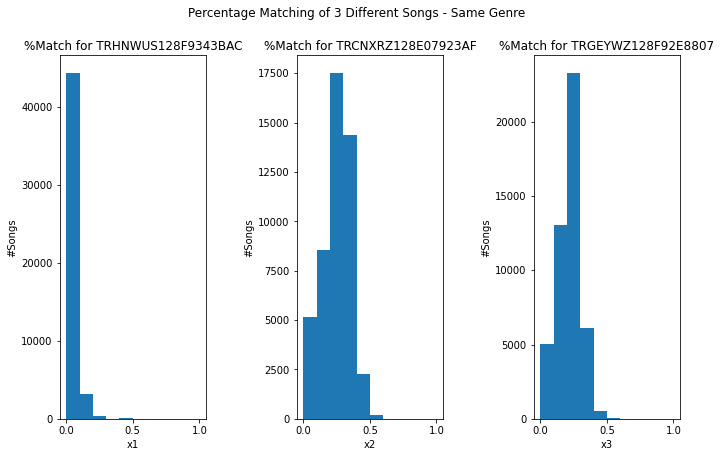

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data=np.random.random((4,10))
data = [percentages[0], percentages[1], percentages[2]]
xaxes = ['x1','x2','x3']
yaxes = ['#Songs','#Songs','#Songs']
titles = ['%Match for ' + track_list[sample[0]],'%Match for ' + track_list[sample[1]],'%Match for ' + track_list[sample[2]]] 

f,a = plt.subplots(1,3, figsize = (10,6))
f.suptitle('Percentage Matching of 3 Different Songs - Same Genre', y = 1.05)
# a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])

plt.tight_layout()

In [ ]:
percentages = []

sample = [24500, 8265, 20251]
for index in range(len(sample)):
  song_of_interest = lb_dict[track_list[sample[index]]] #will have to choose a smaller sample of songs to compare 
  print(song_of_interest)
  percentage_of_shared_words = []
    # print(lb_dict[x].keys())
  for y in lb_dict:
      if song_of_interest != y and genre_list[track_list.index(track_list[sample[index]])] != genre_list[track_list.index(y)]:
      # if track_list[2] != y and len(lb_dict[y].keys()) > 4:
        percentage_of_shared_words.append(len(song_of_interest & lb_dict[y].keys())/len(song_of_interest))
          # intersection_of_keys.append([percentage_of_shared_words, len(song_of_interest[x].keys()), len(lb_dict[y].keys()), x, y])
  
  percentages.append(percentage_of_shared_words)

{'se': 1, 'chorus': 2, 'ja': 6, 'ei': 2, 'x2': 1, 'kun': 2, 'alla': 1, 'mie': 1, 'soi': 2, 'olla': 1}
{'i': 23, 'the': 27, 'you': 2, 'and': 2, 'me': 3, 'it': 1, 'not': 10, 'is': 1, 'of': 3, 'that': 2, 'do': 11, 'are': 1, 'love': 4, 'know': 1, 'this': 1, 'but': 3, 'what': 3, 'when': 2, 'can': 1, 'there': 1, 'out': 17, 'get': 1, 'see': 2, 'got': 1, 'ca': 2, 'day': 6, 'life': 2, 'yeah': 8, 'night': 6, 'been': 1, 'think': 1, 'onli': 1, 'whi': 5, 'well': 3, 'good': 1, 'turn': 6, 'then': 1, 'light': 16, 'into': 6, 'hear': 1, 'hey': 15, 'should': 3, 'old': 1, 'pleas': 5, 'care': 1, 'hope': 1, 'put': 16, 'blue': 1, 'beauti': 2, 'understand': 1, 'best': 2, 'knew': 3, 'somebodi': 9, 'trust': 4, 'worri': 1, 'joy': 1, 'quit': 3, 'everywher': 1, 'taken': 1, 'makin': 1, 'melodi': 1, 'hurri': 1, 'symphoni': 1}
{'i': 14, 'the': 6, 'you': 4, 'to': 2, 'and': 5, 'a': 1, 'me': 5, 'it': 3, 'in': 1, 'my': 12, 'is': 1, 'your': 1, 'do': 2, 'on': 4, 'am': 3, 'will': 3, 'all': 1, 'for': 2, 'no': 1, 'have': 3, '

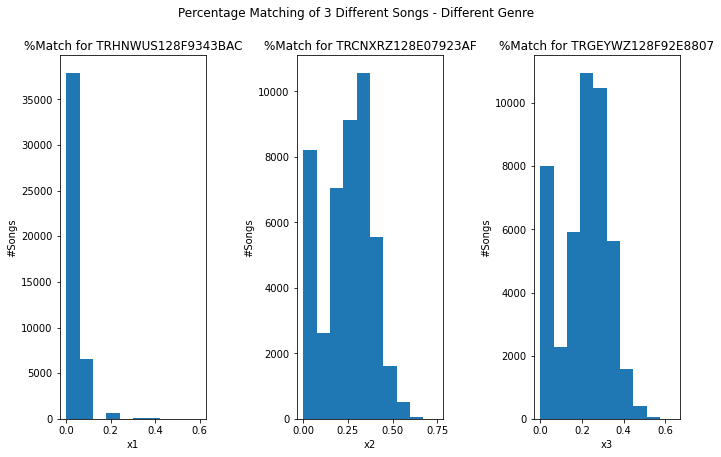

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data=np.random.random((4,10))
data = [percentages[0], percentages[1], percentages[2]]
xaxes = ['x1','x2','x3']
yaxes = ['#Songs','#Songs','#Songs']
titles = ['%Match for ' + track_list[sample[0]],'%Match for ' + track_list[sample[1]],'%Match for ' + track_list[sample[2]]] 

f,a = plt.subplots(1,3, figsize = (10,6))
f.suptitle('Percentage Matching of 3 Different Songs - Different Genre', y = 1.05)
# a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])

plt.tight_layout()

# Cosine Similarity

In [ ]:
import gensim
import scipy
from scipy.spatial import distance
import gensim.downloader as api
from gensim.models import Word2Vec
import math




# 90 training set: train word2vec on those word embeddings
# final 10% used for song prediction 

In [ ]:
#training 

lyrics_train = main_lyrics_list[0:math.floor(len(main_lyrics_list)*0.8)]
print(lyrics_train[1])
print(type(lyrics_train))

#testing 
lyrics_test = main_lyrics_list[math.floor(len(main_lyrics_list)*0.8): len(main_lyrics_list)]

w2vd_model = Word2Vec(lyrics_train, min_count = 1, size = 50, sg = 1)

['know', 'got', 'got', 'got', 'feel', 'let', 'would', 'would', 'would', 'eye', 'world', 'right', 'think', 'wo', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'girl', 'everi', 'everi', 'everi', 'everi', 'everi', 'everi', 'everi', 'everi', 'everi', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'someth', 'tonight', 'old', 'boy', 'mine', 'someon', 'star', 'wish', 'smile', 'shine', 'ask', 'ask', 'ask', 'white', 'three', 'send', 'treat', 'relax', 'tip', 'pearl', 'curl']
<class 'list'>


In [ ]:
w2vd_model.most_similar('a')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('me', 0.9017356634140015),
 ('and', 0.8820539712905884),
 ('to', 0.8656648397445679),
 ('it', 0.8379960060119629),
 ('in', 0.8167686462402344),
 ('not', 0.8135481476783752),
 ('you', 0.8055253028869629),
 ('the', 0.7929377555847168),
 ('is', 0.7694488763809204),
 ('my', 0.7681124806404114)]

In [ ]:
print(len(lyrics_train[2]))

sentence_1 = w2vd_model[lyrics_test[1]]
# print(sentence_1.shape.sum(axis=0))
sentence_2 = w2vd_model[lyrics_test[2]]
distance = scipy.spatial.distance.cosine(sentence_1.sum(axis=0), sentence_2.sum(axis=0))
print(distance)
sentence_2 = w2vd_model[lyrics_test[3]]
distance = scipy.spatial.distance.cosine(sentence_1.sum(axis=0), sentence_2.sum(axis=0))
print(distance)


158
0.28962600231170654
0.02296900749206543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
import random
import math 

track_train = track_list[0:math.floor(len(main_lyrics_list)*0.8)]
genre_train = genre_list[0:math.floor(len(main_lyrics_list)*0.8)]

track_test = track_list[math.floor(len(main_lyrics_list)*0.8): len(main_lyrics_list)]
genre_test = genre_list[math.floor(len(main_lyrics_list)*0.8): len(main_lyrics_list)]

# sample_test = random.sample(range(0, len(track_test)), 1)
# print(sample_test)
sample_test = [9276]
input_song = w2vd_model[lyrics_test[sample_test[0]]]
song_pairs = []

for index in range(len(track_train)):
  if index != sample_test and genre_train[index] != genre_train[sample_test[0]] and len(lyrics_train[index]) != 0:
    try: 
      index_song = w2vd_model[lyrics_train[index]]
      dist = scipy.spatial.distance.cosine(input_song.sum(axis=0), index_song.sum(axis=0))
      song_pairs.append([dist, track_train[index]])
    except KeyError:
      # print(index)
      index += 1


for index in range(len(track_test)):
  if index != sample_test and genre_test[index] != genre_test[sample_test[0]] and len(lyrics_test[index]) != 0:
    try: 
      index_song = w2vd_model[lyrics_test[index]]
      dist = scipy.spatial.distance.cosine(input_song.sum(axis=0), index_song.sum(axis=0))
      song_pairs.append([dist, track_test[index]])
    except KeyError:
      # print(index)
      index = index 

song_pairs.sort()






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
for index in range(10):
  print("Recommendation", index + 1, ":", song_pairs[index][1])

Recommendation 1 : TRSPBAV128F427786A
Recommendation 2 : TRQMQTZ128F92DC10A
Recommendation 3 : TRWWJDX128F42818C7
Recommendation 4 : TRDMFZZ128F423D4B1
Recommendation 5 : TROLFDU12903CBDF36
Recommendation 6 : TRMJKMB12903CCDC79
Recommendation 7 : TRRWMRA128F92E3989
Recommendation 8 : TRIUNNK12903CCEAD0
Recommendation 9 : TRGIWUB128F1466D61
Recommendation 10 : TREFIVS12903D03ECF


In [ ]:
# print(track_test[9276])
# print(genre_test[9276])
w2vd_model[lyrics_train[2]].sum(axis = 0).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(50,)

In [ ]:
sample_test = [37626, 62255, 50327, 53714, 62845, 37348, 12238, 7439, 14144, 43526]

first_song = w2vd_model[main_lyrics_list[sample_test[len(sample_test) - 1]]]
sample_test.pop()

for index in range(len(sample_test)):
  first_song += w2vd_model[main_lyrics_list[index]].sum(axis = 0)

mean_w2vd = [element * (1/len(list_of_tracks)) for element in first_song]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
mean_w2vd = np.asarray(mean_w2vd)
len(main_lyrics_list)

93356

In [ ]:
song_pairs_w2vd_mean = []

for index in range(len(list_of_tracks)):
  if index not in sample_test:
    try: 
      try: 
        index_song = w2vd_model[main_lyrics_list[index]]
      except KeyError:
        index = index 
      # print(index_song.shape)
      # print(mean_w2vd.shape)
      try: 
        dist = scipy.spatial.distance.cosine(mean_w2vd.sum(axis=0), index_song.sum(axis = 0))
        song_pairs_w2vd_mean.append([dist, list_of_tracks[index]])
      except ValueError:
        index = index
    except ValueError:
      index = index 

song_pairs_w2vd_mean.sort()

print("Recommendation:", song_pairs_w2vd_mean[0][1])

# index_song.sum(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Recommendation: TRQNHFG128F932047D


In [ ]:
lyrics_test[0]

['love',
 'like',
 'one',
 'let',
 'let',
 'say',
 'ca',
 'ca',
 'ca',
 'away',
 'away',
 'life',
 'life',
 'life',
 'could',
 'night',
 'night',
 'night',
 'night',
 'look',
 'world',
 'world',
 'right',
 'onli',
 'onli',
 'onli',
 'onli',
 'tri',
 'tri',
 'tri',
 'tri',
 'well',
 'us',
 'lie',
 'end',
 'end',
 'stay',
 'stay',
 'much',
 'last',
 'tonight',
 'tonight',
 'sun',
 'show',
 'peopl',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'bring',
 'done',
 'shine',
 'first',
 'pour',
 'fade',
 'fade',
 'moon',
 'rest',
 'rest',
 'rest',
 'stare',
 'sight',
 'sight',
 'sight',
 'tight',
 'yesterday',
 'wine',
 'given',
 'given',
 'given',
 'embrac',
 'heartach',
 'heartach',
 'heartach',
 'sunris',
 'sunris',
 'compar',
 'compar',
 'compar',
 'ceil']

# lyrics correlates with genre? 
- idea: how individual words correlate with song, first filter out stop words because they will probably be contained in a lot of songs (pick the 20 most popular, 20 least particular) --> give better idea of what people sing about 
- helpful source: https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/bar_stacked.html
- even more helpful resource: https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
- sort by sum of column: https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
- even better source: https://stackoverflow.com/questions/44723008/sorting-a-matrix-by-row-sum-preferably-bash-or-python
- then maybe do two words both contained in the same song 
- idea: decision tree based on number of particular word, likelihood of genre given lyrics 
# lyrics correlated with language (English, Spanish) 
# cluster the song based on word_count or some feature we find useful and see if the cluster map out 

- words in Spanish than mean different things in English 